**PREDICCIÓN DEL ESTADO DE BOMBAS DE AGUA EN TANZANIA 🌎💧**


- **Alumna**: Isabel Giraldo Álvarez
- **Curso**: Máster Big Data & Business Analytics
- **Fecha de entrega**:
- **Score obtenido en el concurso**: 0.8035

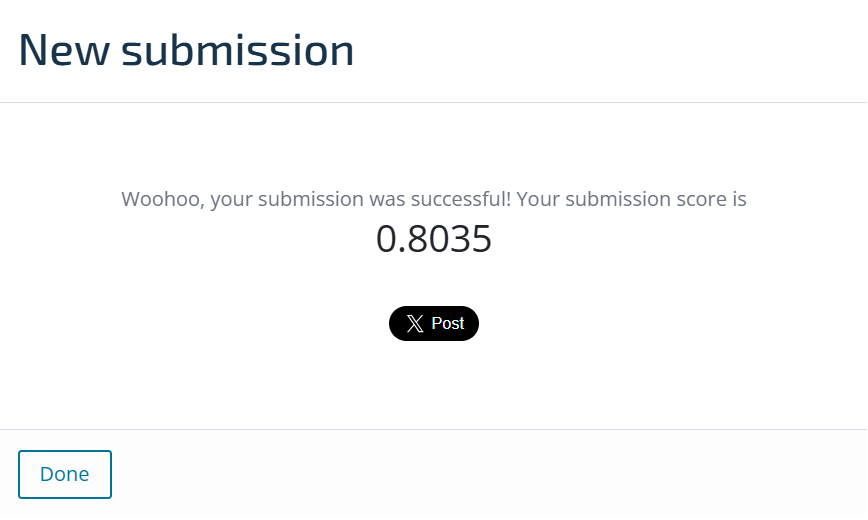

In [9]:
# Captura del score obtenido en el concurso

from IPython.display import Image, display

display(Image("score_concurso.png", width=500))

**🎯 OBJETIVO DEL TRABAJO**

El objetivo del proyecto es desarrollar un modelo predictivo que determine el estado funcional de las bombas de agua en Tanzania, mediante Machine Learning. Se parte desde un dataset que tiene múltiples variables, y que incluye datos categóricos que tienen una alta cardinaidad, valores faltantes y una variable objetivo que está desbalanceada y con tres clases posibles:

- 'functional'
- 'non functional'
- 'functional needs repair'

El proceso que hemos realizado incluye limpieza, exploración, entrenamiento y evaluación del modelo, concluyendo con la realización de precciones para participar en una competición de datos.

**📋 ÍNDICE**

1. Carga de datos
2. Análisis Exploratorio
3. Preprocesamiento de datos
4. Entrenamiento y validación del modelo
5. Predicción sobre el conjunto de test
6. Conclusión

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EtiquetasConjuntoEntrenamiento.csv to EtiquetasConjuntoEntrenamiento.csv
Saving SubmissionFormat.csv to SubmissionFormat.csv
Saving ValoresConjuntoEntrenamiento.csv to ValoresConjuntoEntrenamiento.csv
Saving ValoresConjuntoPruebas.csv to ValoresConjuntoPruebas.csv


In [ ]:
import pandas as pd

# Cargamos los datasets
train_features = pd.read_csv('ValoresConjuntoEntrenamiento.csv', delimiter=',')
train_labels = pd.read_csv('EtiquetasConjuntoEntrenamiento.csv', delimiter=',')
test_features = pd.read_csv('ValoresConjuntoPruebas.csv', delimiter=',')
submission_format = pd.read_csv('SubmissionFormat.csv', delimiter=',')

In [ ]:
train_features.head(), train_labels.head(), test_features.head(), submission_format.head()

(      id  amount_tsh date_recorded        funder  gps_height     installer  \
 0  69572      6000.0    2011-03-14         Roman        1390         Roman   
 1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
 2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
 3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
 4  19728         0.0    2011-07-13   Action In A           0       Artisan   
 
    longitude   latitude              wpt_name  num_private  ... payment_type  \
 0  34.938093  -9.856322                  none            0  ...     annually   
 1  34.698766  -2.147466              Zahanati            0  ...    never pay   
 2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
 3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
 4  31.130847  -1.825359               Shuleni            0  ...    never pay   
 
   water_quality quality_group      

In [ ]:
train_df = pd.merge(train_features, train_labels, on='id')
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
# Vemos la distribución de la variable objetivo
print("Distribución de clases:")
train_df['status_group'].value_counts(normalize=True)
train_df['status_group'].value_counts()

Distribución de clases:


,count
status_group,
functional,32259
non functional,22824
functional needs repair,4317


In [ ]:
# Vemos la información del dataset
print("Información de las columnas del dataset:")
train_df.info()

Información de las columnas del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code

In [ ]:
# Valores null
print("Valores null por columna:")
train_df.isnull().sum().sort_values(ascending=False)

Valores null por columna:


,0
scheme_name,28810
scheme_management,3878
installer,3655
funder,3637
public_meeting,3334
permit,3056
subvillage,371
wpt_name,2
id,0
latitude,0


Por una parte, scheme_name, tiene casi la mitad de valores nulos, por lo que no aporta mucho y la vamos a eliminar. Por otra parte, las columnas categóricas con pocos nulos las vamos a rellenar con 'Unknown'.

In [ ]:
#Eliminamos la columna con casi más de la mitad de nulos
train_df = train_df.drop(columns=['scheme_name'])

In [ ]:
# Rellenamos las columnas categóricas con 'Unknown'
cols_fill_unknown = ['funder', 'installer', 'scheme_management', 'permit', 'public_meeting', 'subvillage', 'wpt_name']

for col in cols_fill_unknown:
  train_df[col] = train_df[col].fillna('Unknown')

In [ ]:
# Pasamos la fecha a tipo datetime, creamos columnas de mes y año y eliminamos la original para simplificar
train_df['date_recorded'] = pd.to_datetime(train_df['date_recorded'])

train_df['year_recorded'] = train_df['date_recorded'].dt.year
train_df['month_recorded'] = train_df['date_recorded'].dt.month

train_df = train_df.drop(columns=['date_recorded'])

In [ ]:
# Calculamos la antigüedad de la bomba, creamos la columna 'age' y reemplazamos las edades inválidas
import numpy as np

train_df['age'] = train_df['year_recorded'] - train_df['construction_year']
train_df['age'] = train_df['age'].apply(lambda x: x if x >= 0 else np.nan)

In [ ]:
# Vemos las categóricas y los valores únicos que tienen
categorial_cols = train_df.select_dtypes(include='object').columns

unique_categories = []

for col in categorial_cols:
  uniques = train_df[col].nunique()
  unique_categories.append((col, uniques))

unique_categories.sort(key=lambda x: x[1], reverse=True)

for col, uniques in unique_categories:
  print(f"{col}: {uniques} categorías únicas")

wpt_name: 37399 categorías únicas
subvillage: 19288 categorías únicas
installer: 2145 categorías únicas
ward: 2092 categorías únicas
funder: 1896 categorías únicas
lga: 125 categorías únicas
region: 21 categorías únicas
extraction_type: 18 categorías únicas
extraction_type_group: 13 categorías únicas
scheme_management: 12 categorías únicas
management: 12 categorías únicas
source: 10 categorías únicas
basin: 9 categorías únicas
water_quality: 8 categorías únicas
extraction_type_class: 7 categorías únicas
payment: 7 categorías únicas
payment_type: 7 categorías únicas
source_type: 7 categorías únicas
waterpoint_type: 7 categorías únicas
quality_group: 6 categorías únicas
waterpoint_type_group: 6 categorías únicas
management_group: 5 categorías únicas
quantity: 5 categorías únicas
quantity_group: 5 categorías únicas
public_meeting: 3 categorías únicas
permit: 3 categorías únicas
source_class: 3 categorías únicas
status_group: 3 categorías únicas
recorded_by: 1 categorías únicas


A continuación, eliminaremos 'wpt_name', ya que tiene 37.399 valores únicos, por lo que no aporta mucho valor. También agruparemos las categorías menos frecuentes en 'Other' y aplicaremos la función creada a las columnas que seleccionaremos a continuación.

In [ ]:
train_df = train_df.drop(columns=['wpt_name'])

def reducir_cardinalidad(columna, top_n=10):
  top_categories = train_df[columna].value_counts().nlargest(top_n).index
  train_df[columna] = train_df[columna].apply(lambda x: x if x in top_categories else 'Other')

columnas_reducir = ['funder', 'installer', 'subvillage', 'ward']

for col in columnas_reducir:
  reducir_cardinalidad(col)

In [ ]:
# Usamos el One-Hot encoding para las columnas categóricas
train_df_encoded = pd.get_dummies(train_df, drop_first=True)

El siguiente paso será empezar a entrenal el modelo para que aprenda a predecir el estado de las bombas "status_gruop", a partir de los datos preprocesados.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Empezamos separando la X (variables predictoras) y la Y (variable objetivo)
X = train_df_encoded.drop(columns=['status_group_non functional', 'status_group_functional needs repair'])
Y = train_df['status_group']

# Dividimos en train y test
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Hacemos el Random Forest y la validación
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_val)
print("Reporte de clasificación:")
print(classification_report(Y_val, Y_pred))

Reporte de clasificación:
                         precision    recall  f1-score   support

             functional       0.81      0.88      0.84      6452
functional needs repair       0.51      0.31      0.38       863
         non functional       0.83      0.79      0.81      4565

               accuracy                           0.80     11880
              macro avg       0.72      0.66      0.68     11880
           weighted avg       0.80      0.80      0.80     11880



Tenemos un accuracy general del 80% y un bien rendimiento en las clases "functional" y "non functional", lo que indica que tenemos un buen punto de partida.

El modelo presenta algunas dificultades con la clase "needs repair", sobre todo en el recall, ya que tan solo acierta el 31%.

La solución que se propone es usar "class_weight = 'balanced' en el Random Forest", ya que el modelo le dará más peso a las clases minoritarias, como la anteriormente mencionada. Este paso normalmente suele mejorar el recall y f1-score de estas clases.

In [ ]:
model_balanced = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

model_balanced.fit(X_train, Y_train)

Y_pred_bal = model_balanced.predict(X_val)
print("Reporte de clasificación con class_weight='balanced':\n")
print(classification_report(Y_val, Y_pred_bal))

Reporte de clasificación con class_weight='balanced':

                         precision    recall  f1-score   support

             functional       0.81      0.89      0.84      6452
functional needs repair       0.53      0.30      0.39       863
         non functional       0.83      0.78      0.81      4565

               accuracy                           0.80     11880
              macro avg       0.72      0.66      0.68     11880
           weighted avg       0.80      0.80      0.80     11880



Comparándolo con el otro modelo, podemos ver que no ha cambiado mucho, lo que significa que nuestro modelo no ha empeorado.

- Precision ha subido un poco (0.51 a 0.53)
- F1-score ha mejorado ligeramente (0.38 a 0.39)
- Recall ha bajado un poco (0.31 a 0.30)

En conclusión podemos observar que, este modelo "class_weight='balanced'" no empeora el rendimiento, tiene una mejora global muy leve en lo que se refiere a la clase "needs repair".

Ahora generaremos el código para la predicción y generación del archivo para enviarlo.

In [ ]:
# Vamos a copiar el test para no modificar el original y tratamos los valores nulos
test_df = test_features.copy()

cols_fill_unknown = ['funder', 'installer', 'scheme_management', 'permit', 'public_meeting', 'subvillage', 'wpt_name']

for col in cols_fill_unknown:
  test_df[col] = test_df[col].fillna('Unknown')

In [ ]:
# Convertimos la fecha y calculamos la antigüedad
test_df['date_recorded'] = pd.to_datetime(test_df['date_recorded'])
test_df['year_recorded'] = test_df['date_recorded'].dt.year
test_df['month_recorded'] = test_df['date_recorded'].dt.month
test_df = test_df.drop(columns=['date_recorded'])

test_df['age'] = test_df['year_recorded'] - test_df['construction_year']
test_df['age'] = test_df['age'].apply(lambda x: x if x >= 0 else np.nan)

In [ ]:
# Eliminamos las columnas que no son útiles y reducimos cardinalidad como hicimos en el train
test_df = test_df.drop(columns=['scheme_name', 'wpt_name'])

reducir_columnas = ['funder', 'installer', 'subvillage', 'ward']

for col in reducir_columnas:
  top_categories = train_df[col].value_counts().nlargest(10).index
  test_df[col] = test_df[col].apply(lambda x: x if x in top_categories else 'Other')


In [ ]:
# Dummies y alineamos columnas con train (rellenamos con 0) y hacemos predicción
test_df_encoded = pd.get_dummies(test_df, drop_first=True)

test_df_encoded = test_df_encoded.reindex(columns=X.columns, fill_value=0)

predictions = model_balanced.predict(test_df_encoded)

In [ ]:
# Creamos el archivo
submit = pd.DataFrame({
    'id': test_df['id'],
    'status_group': predictions
})

submit.to_csv('final_submit.csv', index=False)

In [ ]:
from google.colab import files
files.download('/content/final_submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**✅ CONCLUSIÓN**

Este notebook documenta un modelo de Machine Learning completo que ayuda a predecir el estado del funcionamiento de las bombas de agua en Tanzania.

Durante todo el trabajo, se ha aplicado un enfoque profesional y realista, abordando algunos retos del mundo real como:

- Valores faltantes
- Variables categóricas con alta cardinalidad
- Clases desbalanceadas
- Preparación del conjunto de test para predicción

El modelo final que está basado en un 'RandomForestClassifier', con algunos ajustes ('class_weight='balanced''), ha logrado un rendimiento muy competitivo ya que ha conseguido un **score del 80.35% en la plataforma del concurso**.

El resultado valida el enfoque que se ha aplicado y demuestra la utilidad de un pipeline bien diseñado y ejecutado, que es capaz de resolver un problema con impacto real.


**Archivo generado**: 'final_submit.csv'

## 🔍 Comparación adicional con XGBoost

Durante el desarollo de la tarea, se han explorado otros modelos como **XGBoost**, al que se le ajustaros automáticamente sus parámetros con *RandomizedSearchCv* para mejorar su rendimiento.

**XGBoost** obtuvo une mejor precisión en la validación local (accuracy ≈ 80.81%), sin embargo, el rendimiento en la plataforma fue inferior (80.02%) comparado con **Random Forest** (80.35%).

Por ese motivo, se ha decidido entregar el modelo basado en Random Forest, ya que ofreció un resultado más sólido en la evaluación final.